In [2]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
%matplotlib inline


In [3]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import pyplot as plt
a=np.loadtxt('a.txt')

In [165]:
x=np.loadtxt('plot3d/x.txt')/1e-6
y=np.loadtxt('plot3d/y.txt')/1e-6
z=np.loadtxt('plot3d/z.txt')/1e-6
###
dx=1
dy=0.3
dz=0.3

lx=200
ly=12
lz=12

###

xedges = np.arange(0,200+dx,dx)
yedges = np.arange(-12,12+dy,dy)
zedges = np.arange(-12,12+dz,dz)
#H, xedges, yedges, zedges = np.histogramdd(x, y, z, bins=(xedges, yedges,zedges))

Y, X, Z= np.meshgrid(yedges, xedges,zedges)
print(X.shape)
print(X.size)
C=X*0
x.shape

for i in range(x.shape[0]):
         C[int(x[i]/dx),int((y[i]+ly)/dy),int((z[i]+lz)/dz)]=C[int(x[i]/dx),int((y[i]+ly)/dy),int((z[i]+lz)/dz)]+1

print(C[C>0].shape)
print(C)#H = H.T

(201, 81, 81)
1318761
(165042,)
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


draw


<Figure size 432x288 with 0 Axes>

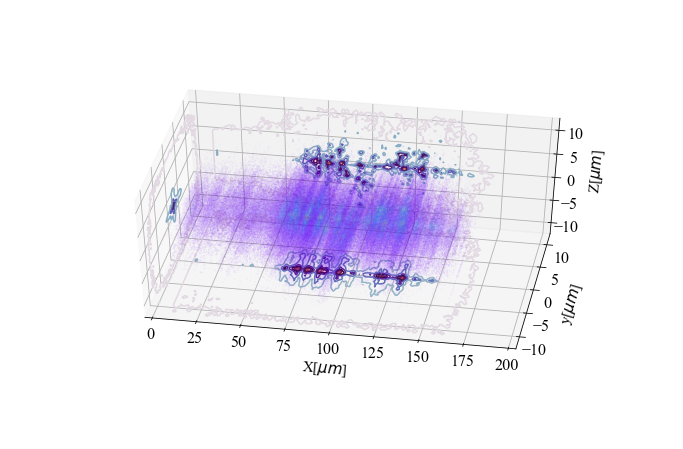

In [168]:
#from matplotlib import animation
import math
def reg_cmap_transparent(iname,alpha):
    oname = iname + '_transparent'
    cmap = plt.get_cmap(iname)
    values = np.linspace(0,1,256)
    colors = cmap(values)
    for i in range(256):
        colors[i][3] = alpha[i]
    colorlist = [(values[i],colors[i]) for i in range(256)]
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list(oname,colorlist)
    plt.cm.register_cmap(cmap=cmap)
    return cmap

def create_alpha(func):
    return [ 1 if func(i)>1 else 0 if func(i)<0 else func(i) for i in range(256)]

font = {'family' : 'Times New Roman',
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 15,  
        }  
color='rainbow'
index = 6
#plt.set_cmap(reg_cmap_transparent(color,create_alpha(lambda x:(1-abs(x/127.5-1)**index))))
plt.set_cmap(reg_cmap_transparent(color,create_alpha(lambda x:(np.exp(x/(256))-0.9))))

#(x/200)**2+0.2
#plt.set_cmap(reg_cmap_transparent(color,create_alpha(lambda x:((x/200)**2+0.2))))
#plt.set_cmap(reg_cmap_transparent(color,create_alpha(lambda x:0.2)))
cmap = plt.get_cmap()

name='${e_k}$  '
font_size = 20
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111,projection='3d')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([12,8,8,12]))
ax.view_init(45,-80)
#x=a[:,1]/1e-6
#y=a[:,2]/1e-6
#z=a[:,3]/1e-6
#color=a[:,0]
'''
x=np.loadtxt('plot3d/x.txt')/1e-6
y=np.loadtxt('plot3d/y.txt')/1e-6
z=np.loadtxt('plot3d/z.txt')/1e-6
xedges = np.arange(0,200,2)
yedges = np.arange(-12,13,1)
zedges = np.arange(-12,13,1)

#H, xedges, yedges, zedges = np.histogramdd(x, y, z, bins=(xedges, yedges,zedges))

X, Y, Z= np.meshgrid(yedges, zedges,zedges)

C=X*0

for i in range(x.shape[0]):
        print(i)
        C[int(x[i]/2),int((y[i]+12)/1),int((z[i]+12)/1)]=C[int(x[i]/2),int((y[i]+12)/1),int((z[i]+12)/1)]+1
'''



C  = C.reshape(np.size(C))
X    = X.reshape(np.size(X))
Y    = Y.reshape(np.size(Y))
Z    = Z.reshape(np.size(Z))
print('draw')
im=ax.scatter(X[C>0],Y[C>0],Z[C>0],s=0.1,c=C[C>0],cmap=cmap)

#cbar=plt.colorbar(im,fraction=0.015,pad=-0.1)#,ticks=np.linspace(450, 650, 5),fraction=0.015,pad=-0.1)

#cbar.set_label(name+r'$[meV]$',fontdict=font)

#im.set_clim((0,3))


cset = ax.contour(X1[:-1,:-1], Y1[:-1,:-1],H,zdir='z',offset=-lz,cmap=cm.twilight)
cset2 = ax.contour(X2[:-1,:-1],H2,Z2[:-1,:-1],zdir='y',offset=ly,cmap=cm.twilight)
cset3 = ax.contour(H3,Y3[:-1,:-1],Z3[:-1,:-1],zdir='x',offset=0,cmap=cm.twilight)




ax.set_xlabel('\n\nX'+ '[$\mu m$]',fontdict=font)
ax.set_ylabel('\ny'+ '[$\mu m$]',fontdict=font)
ax.set_zlabel('\nZ'+ '[$\mu m$]',fontdict=font)
cbar.ax.tick_params(labelsize=16)
#im.set_clim([0,600])
plt.tick_params(labelsize=16)
labels = ax.get_xticklabels() + ax.get_yticklabels() + ax.get_zticklabels()
[label.set_fontname('Times New Roman') for label in labels]

ax.set_zlim((-12,12))
ax.set_ylim((-12,12))
ax.set_xlim((0,200))

fig.savefig('3d0.1.png',dpi=400)
#def rotate(angle): 
#   ax.view_init(azim=angle) 
#rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100) 
#rot_animation.save('rotation.gif', dpi=80, writer='imagemagick') 



In [167]:
###投影####
#dx=0.1
#dy=0.1
#dz=0.1
#ly=12
#lz=12
###
xedges = np.arange(0,200,dx)
yedges = np.arange(-12,12+ly,dy)
zedges = np.arange(-12,12+lz,dz)

###
H, xedges1, yedges1 = np.histogram2d(x, y, bins=(xedges, yedges))
H = H.T

xedges2 = np.arange(0,210,10)
zedges2 = np.arange(-10,11,1)
H2, xedges2, zedges2 = np.histogram2d(x, z, bins=(xedges, zedges))
H2 = H2.T

yedges3 = np.arange(-10,11,1)
zedges3 = np.arange(-10,11,1)
H3, yedges3, zedges3 = np.histogram2d(y, z, bins=(yedges, zedges))
H3 = H3.T

#im=ax.scatter(x[color>450],y[color>450],z[color>450],s=0.1,c=color[color>450],cmap=cmap)

#im=ax.scatter(x,y,z,s=0.1,c=color,cmap=cmap)

#ax.contourf(x,y,z=10,s=0.1,zdir='y',cmap=cmap)#, c=c_list, label='points in (x, z)')

X1, Y1 = np.meshgrid(xedges1, yedges1)

X2, Z2 = np.meshgrid(xedges2, zedges2)

Y3, Z3 = np.meshgrid(yedges3, zedges3)

<Figure size 432x288 with 0 Axes>

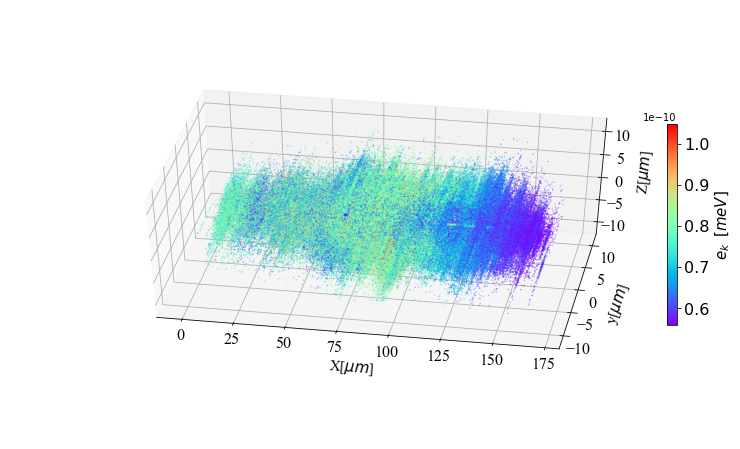

In [14]:
#from matplotlib import animation
def reg_cmap_transparent(iname,alpha):
    oname = iname + '_transparent'
    cmap = plt.get_cmap(iname)
    values = np.linspace(0,1,256)
    colors = cmap(values)
    for i in range(256):
        colors[i][3] = alpha[i]
    colorlist = [(values[i],colors[i]) for i in range(256)]
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list(oname,colorlist)
    plt.cm.register_cmap(cmap=cmap)
    return cmap

def create_alpha(func):
    return [ 1 if func(i)>1 else 0 if func(i)<0 else func(i) for i in range(256)]

font = {'family' : 'Times New Roman',
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 15,  
        }  
color='rainbow'
index = 1
plt.set_cmap(reg_cmap_transparent(color,create_alpha(lambda x:(1-abs(x/127.5-1)**index))))
cmap = plt.get_cmap()

name='${e_k}$  '
font_size = 20
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111,projection='3d')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([12,8,8,12]))
ax.view_init(45,-80)
#x=a[:,1]/1e-6
#y=a[:,2]/1e-6
#z=a[:,3]/1e-6
#color=a[:,0]
x=np.loadtxt('plot3d/x.txt')/1e-6
y=np.loadtxt('plot3d/y.txt')/1e-6
z=np.loadtxt('plot3d/z.txt')/1e-6
color=np.loadtxt('plot3d/ek.txt')
im=ax.scatter(x,y,z,s=0.1,c=color,cmap=cm.rainbow)#cmap)

cbar=plt.colorbar(im,fraction=0.015,pad=-0.1)#,ticks=np.linspace(450, 650, 5),fraction=0.015,pad=-0.1)
cbar.set_label(name+r'$[meV]$',fontdict=font)
ax.set_xlabel('\n\nX'+ '[$\mu m$]',fontdict=font)
ax.set_ylabel('\ny'+ '[$\mu m$]',fontdict=font)
ax.set_zlabel('\nZ'+ '[$\mu m$]',fontdict=font)
cbar.ax.tick_params(labelsize=16)
#im.set_clim([0,600])
plt.tick_params(labelsize=16)
labels = ax.get_xticklabels() + ax.get_yticklabels() + ax.get_zticklabels()
[label.set_fontname('Times New Roman') for label in labels]



fig.savefig('3daaa.png',dpi=400)
#def rotate(angle): 
#   ax.view_init(azim=angle) 
#rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100) 
#rot_animation.save('rotation.gif', dpi=80, writer='imagemagick') 


In [4]:
a=np.loadtxt('a.txt')

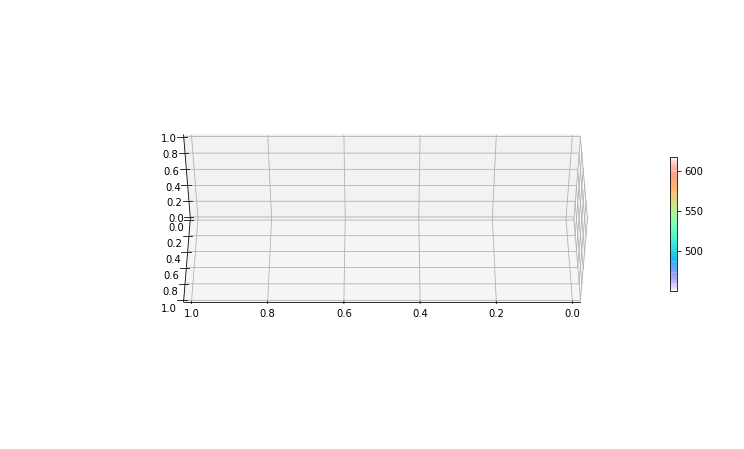

In [279]:
fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(111, projection='3d')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([10,5,5,10]))
def reg_cmap_transparent(iname,alpha):
    oname = iname + '_transparent'
    cmap = plt.get_cmap(iname)
    values = np.linspace(0,1,256)
    colors = cmap(values)
    for i in range(256):
        colors[i][3] = alpha[i]
    colorlist = [(values[i],colors[i]) for i in range(256)]
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list(oname,colorlist)
    plt.cm.register_cmap(cmap=cmap)
    return cmap

def create_alpha(func):
    return [ 1 if func(i)>1 else 0 if func(i)<0 else func(i) for i in range(256)]

font = {'family' : 'monospace',  
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 15,  
        }  
color='rainbow'
index = 4
def alpha(n):
    if n < 26:
        return 0
    if n > 26:
        return 100
    

#_min = max(np.max(var),np.min(var))**(0.002**(1.0/index)) if log else max(np.max(var),np.min(var))*0.002**(1.0/index)
plt.set_cmap(reg_cmap_transparent('bwr',create_alpha(lambda x:1-abs(x/127.5-1)**index)))
#plt.set_cmap(reg_cmap_transparent('rainbow',create_alpha(lambda x:0)))
cmap = plt.get_cmap()
ax.view_init(45, 90)
plt.colorbar(im,fraction=0.01,pad=-0.1)
plt.show()

In [283]:
np.linspace(450, 650, 5)

array([450., 500., 550., 600., 650.])

In [113]:
x=a[:,1]/1e-6
y=a[:,2]/1e-6
z=a[:,3]/1e-6
color=a[:,0]
print(x.shape)

ax=np.delete(x,x<1100)
ay=np.delete(y,x<1100)
az=np.delete(z,x<1100)
ac=np.delete(color,x<1100)
print(x.shape)
print(ax.shape)

(576107,)
(576107,)
(576106,)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
  if __name__ == '__main__':


In [122]:
(x<5)

array([False, False, False, ..., False, False, False])

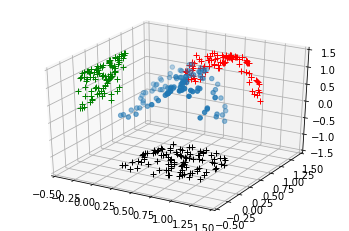

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x= np.random.random(100)
y= np.random.random(100)
z= np.sin(3*x**2+y**2)

fig= plt.figure()
ax= fig.add_subplot(111, projection= '3d')
ax.scatter(x,y,z)

ax.plot(x, z, 'r+', zdir='y', zs=1.5)
ax.plot(y, z, 'g+', zdir='x', zs=-0.5)
ax.plot(x, y, 'k+', zdir='z', zs=-1.5)

ax.set_xlim([-0.5, 1.5])
ax.set_ylim([-0.5, 1.5])
ax.set_zlim([-1.5, 1.5])

plt.show()

<Figure size 432x288 with 0 Axes>

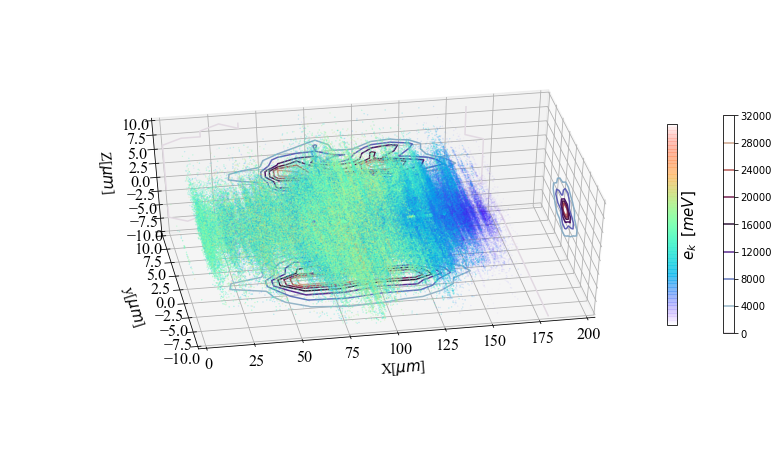

In [10]:
#from matplotlib import animation
def reg_cmap_transparent(iname,alpha):
    oname = iname + '_transparent'
    cmap = plt.get_cmap(iname)
    values = np.linspace(0,1,256)
    colors = cmap(values)
    for i in range(256):
        colors[i][3] = alpha[i]
    colorlist = [(values[i],colors[i]) for i in range(256)]
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list(oname,colorlist)
    plt.cm.register_cmap(cmap=cmap)
    return cmap

def create_alpha(func):
    return [ 1 if func(i)>1 else 0 if func(i)<0 else func(i) for i in range(256)]

font = {'family' :'Times New Roman', 
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 15,  
        }  
color='rainbow'
index = 1
plt.set_cmap(reg_cmap_transparent(color,create_alpha(lambda x:(1-abs(x/127.5-1)**index))))
cmap = plt.get_cmap()

name='${e_k}$  '
font_size = 20


#####figure size########
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111,projection='3d')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([12,8,8,12]))

######rotation#########
ax.view_init(45,-100)

#######normalnize#########
#x=a[:,1]/1e-6
#y=a[:,2]/1e-6
#z=a[:,3]/1e-6
#color=a[:,0]

x=np.loadtxt('plot3d/x.txt')/1e-6
y=np.loadtxt('plot3d/y.txt')/1e-6
z=np.loadtxt('plot3d/z.txt')/1e-6
color=np.loadtxt('plot3d/ek.txt')
#density=np.ones((x[color>450].shape,y[color>450].shape))


########contour##########
########################

#######figure out density########
############################

##########x,y################
xedges = np.arange(0,220,20)
yedges = np.arange(-10,11,1)
H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
H = H.T

xedges2 = np.arange(0,210,10)
zedges2 = np.arange(-10,11,1)
H2, xedges2, zedges2 = np.histogram2d(x, z, bins=(xedges2, zedges2))
H2 = H2.T

yedges3 = np.arange(-10,11,1)
zedges3 = np.arange(-10,11,1)
H3, yedges3, zedges3 = np.histogram2d(y, z, bins=(yedges3, zedges3))
H3 = H3.T

#im=ax.scatter(x[color>450],y[color>450],z[color>450],s=0.1,c=color[color>450],cmap=cmap)

im=ax.scatter(x,y,z,s=0.1,c=color,cmap=cmap)

#ax.contourf(x,y,z=10,s=0.1,zdir='y',cmap=cmap)#, c=c_list, label='points in (x, z)')

X, Y = np.meshgrid(xedges, yedges)

X2, Z2 = np.meshgrid(xedges2, zedges2)

Y3, Z3 = np.meshgrid(yedges3, zedges3)

cset = ax.contour(X[:-1,:-1], Y[:-1,:-1],H,zdir='z',offset=-10,cmap=cm.twilight)
cset2 = ax.contour(X2[:-1,:-1],H2,Z2[:-1,:-1],zdir='y',offset=10,cmap=cm.twilight)
cset3 = ax.contour(H3,Y3[:-1,:-1],Z3[:-1,:-1],zdir='x',offset=200,cmap=cm.twilight)
#ax.contourf(x[color>450],y[color>450],H.T,cmap=cmap)

#ax.pcolormesh(x[color>450],z[color>450],cmap=cmap,zdir='y')
#ax.pcolormesh(y[color>450],z[color>450],cmap=cmap,zdir='x')
#ax.pcolormesh(x[color>450],y[color>450],cmap=cmap,zdir='z')

cbar=plt.colorbar(im,ticks=np.linspace(450, 650, 5),fraction=0.015,pad=-0.1)
cbar2=plt.colorbar(cset,fraction=0.015,pad=0)

cbar.set_label(name+r'$[meV]$',fontdict=font)

ax.set_xlabel('\n\nX'+ '[$\mu m$]',fontdict=font)
ax.set_ylabel('\n\ny'+ '[$\mu m$]',fontdict=font)
ax.set_zlabel('\n\nZ'+ '[$\mu m$]',fontdict=font)

cbar.ax.tick_params(labelsize=16)
#im.set_clim([0,600])
plt.tick_params(labelsize=16)
labels = ax.get_xticklabels() + ax.get_yticklabels() + ax.get_zticklabels()
[label.set_fontname('Times New Roman') for label in labels]

ax.set_zlim((-10,10))
ax.set_ylim((-10,10))
ax.set_xlim((0,200))
fig.savefig('3daaa.png',dpi=400,bbox_inches = 'tight')
plt.show()
#def rotate(angle): 
#   ax.view_init(azim=angle) 
#rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100) 
#rot_animation.save('rotation.gif', dpi=80, writer='imagemagick') 

In [42]:
a.shape

(576107, 4)

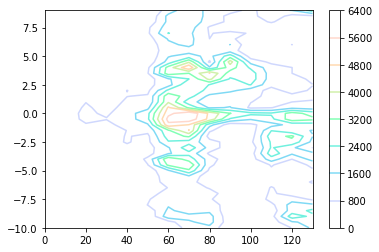

In [52]:
x=a[:,1]/1e-6
y=a[:,2]/1e-6
z=a[:,3]/1e-6
x1=x.shape[0]
y1=y.shape[0]
xedges = np.arange(0,150,10)
yedges = np.arange(-10,10,0.5)
H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
H = H.T
fig = plt.figure()
ax = fig.add_subplot()
X, Y = np.meshgrid(xedges, yedges)
cset=ax.contour(X[:-1,:-1], Y[:-1,:-1], H)
plt.colorbar(cset)#,ticks=np.linspace(450, 650, 5),fraction=0.015,pad=0.1)
plt.show()

In [51]:
a

array([[ 4.7635580e+02,  2.3579746e-05,  7.0004877e-07,  5.7962389e-06],
       [ 4.2563705e+02,  9.8109366e-05,  6.3814234e-06,  1.2637786e-06],
       [ 4.5366619e+02,  1.0592131e-04,  2.6521774e-06, -8.8740249e-08],
       ...,
       [ 3.6253360e+02,  6.8876193e-05, -3.7761984e-06, -3.2214076e-06],
       [ 3.5316015e+02,  6.9245534e-05, -7.6059169e-09,  6.3354825e-07],
       [ 3.5112696e+02,  3.3429726e-05, -3.9163271e-07,  5.4764316e-07]])

TypeError: Input z must be a 2D array.

<Figure size 432x288 with 0 Axes>

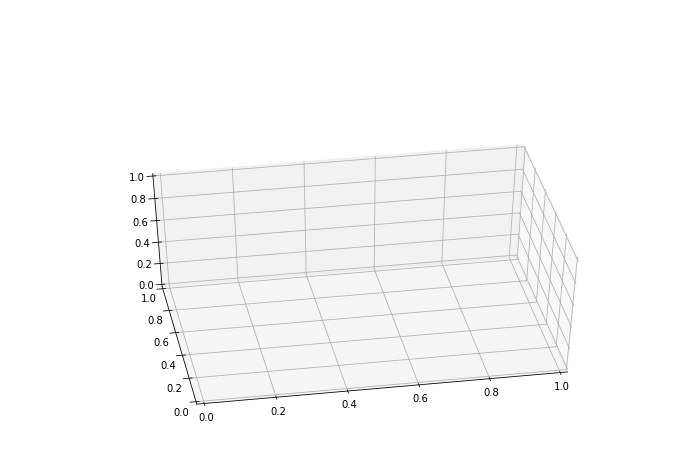

In [5]:
#from matplotlib import animation
def reg_cmap_transparent(iname,alpha):
    oname = iname + '_transparent'
    cmap = plt.get_cmap(iname)
    values = np.linspace(0,1,256)
    colors = cmap(values)
    for i in range(256):
        colors[i][3] = alpha[i]
    colorlist = [(values[i],colors[i]) for i in range(256)]
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list(oname,colorlist)
    plt.cm.register_cmap(cmap=cmap)
    return cmap

def create_alpha(func):
    return [ 1 if func(i)>1 else 0 if func(i)<0 else func(i) for i in range(256)]

font = {'family' : 'monospace',  
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 15,  
        }  
color='rainbow'
index = 0.1
plt.set_cmap(reg_cmap_transparent(color,create_alpha(lambda x:(1-abs(x/127.5-1)**index))))
cmap = plt.get_cmap()

name='Ek_energe  '
font_size = 20
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111,projection='3d')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([12,8,8,12]))
ax.view_init(45,-100)
x=a[:,1]/1e-6
y=a[:,2]/1e-6
z=a[:,3]/1e-6
color=a[:,0]

#density=np.ones((x[color>450].shape,y[color>450].shape))
xedges = np.arange(0,210,10)
yedges = np.arange(-10,10.5,0.5)
H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
H = H.T

xedges = np.arange(0,220,20)
yedges = np.arange(-10,11,1)
H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
H = H.T

xedges2 = np.arange(0,210,10)
zedges2 = np.arange(-10,11,1)
H2, xedges2, zedges2 = np.histogram2d(x, z, bins=(xedges2, zedges2))
H2 = H2.T

yedges3 = np.arange(-10,11,1)
zedges3 = np.arange(-10,11,1)
yedges3, zedges3,H3 = np.histogram2d(y, z, bins=(yedges3, zedges3))
H3 = H3.T

#im=ax.scatter(x[color>450],y[color>450],z[color>450],s=0.1,c=color[color>450],cmap=cmap)

#im=ax.scatter(x,y,z,s=0.1,c=color,cmap=cmap)

#ax.contourf(x,y,z=10,s=0.1,zdir='y',cmap=cmap)#, c=c_list, label='points in (x, z)')

X, Y = np.meshgrid(xedges, yedges)

X2, Z2 = np.meshgrid(xedges2, zedges2)

Y3, Z3 = np.meshgrid(yedges3, zedges3)

#cset = ax.contour(X[:-1,:-1], Y[:-1,:-1],H,zdir='z',offset=-10,cmap=cm.twilight)
#cset2 = ax.contour(X2[:-1,:-1],H2,Z2[:-1,:-1],zdir='y',offset=10,cmap=cm.twilight)
cset3 = ax.contour(H3,Y3[:-1,:-1],Z3[:-1,:-1],zdir='x',offset=200,cmap=cm.twilight)
#ax.contourf(x[color>450],y[color>450],H.T,cmap=cmap)

#ax.pcolormesh(x[color>450],z[color>450],cmap=cmap,zdir='y')
#ax.pcolormesh(y[color>450],z[color>450],cmap=cmap,zdir='x')
#ax.pcolormesh(x[color>450],y[color>450],cmap=cmap,zdir='z')
'''
cbar=plt.colorbar(im,ticks=np.linspace(450, 650, 5),fraction=0.015,pad=-0.1)
cbar2=plt.colorbar(cset,fraction=0.015,pad=0.1)
'''
cbar.set_label(name+r'$[meV]$',fontdict=font)

ax.set_xlabel('\n\nX'+ '[$\mu m$]',fontdict=font)
ax.set_ylabel('\n\ny'+ '[$\mu m$]',fontdict=font)
ax.set_zlabel('\n\nZ'+ '[$\mu m$]',fontdict=font)

ax.set_zlim((-10,10))
ax.set_ylim((-10,10))
ax.set_xlim((0,200))
fig.savefig('3daaa.png',dpi=400)
plt.show()
#def rotate(angle): 
#   ax.view_init(azim=angle) 
#rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100) 
#rot_animation.save('rotation.gif', dpi=80, writer='imagemagick') 

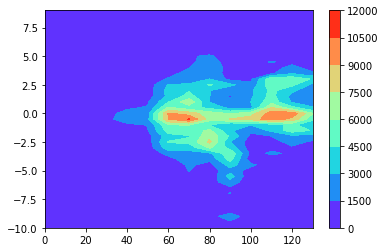

In [20]:
x=np.loadtxt('plot3d/x.txt')/1e-6
y=np.loadtxt('plot3d/y.txt')/1e-6
z=np.loadtxt('plot3d/z.txt')/1e-6
x1=x.shape[0]
y1=y.shape[0]
xedges = np.arange(0,150,10)
zedges = np.arange(-10,10,0.5)
H, xedges, zedges = np.histogram2d(x, z, bins=(xedges, zedges))
H = H.T
fig = plt.figure()
ax = fig.add_subplot()
X, Z = np.meshgrid(xedges, zedges)
cset=ax.contourf(X[:-1,:-1], Z[:-1,:-1], H,cmap=cm.rainbow)
plt.colorbar(cset)#,ticks=np.linspace(450, 650, 5),fraction=0.015,pad=0.1)
plt.show()

In [5]:
x=np.loadtxt('plot3d/x.txt')/1e-6
y=np.loadtxt('plot3d/y.txt')/1e-6
z=np.loadtxt('plot3d/z.txt')/1e-6
xedges = np.arange(0,200,2)
yedges = np.arange(-12,13,0.1)
zedges = np.arange(-12,13,0.1)
#H, xedges, yedges, zedges = np.histogramdd(x, y, z, bins=(xedges, yedges,zedges))

X, Y, Z= np.meshgrid(yedges, zedges,zedges)
print(X.shape)
print(X.size)
C=X*0
x.shape

for i in range(x.shape[0]):
         C[int(x[i]/2),int((y[i]+12)/0.1),int((z[i]+12)/0.1)]=C[int(x[i]/2),int((y[i]+12)/0.1),int((z[i]+12)/0.1)]+1
print(C[C>0].shape)
print(C)#H = H.T



(250, 250, 250)
15625000
(350723,)
[[[-0. -0. -0. ... -0. -0. -0.]
  [-0. -0. -0. ... -0. -0. -0.]
  [-0. -0. -0. ... -0. -0. -0.]
  ...
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]]

 [[-0. -0. -0. ... -0. -0. -0.]
  [-0. -0. -0. ... -0. -0. -0.]
  [-0. -0. -0. ... -0. -0. -0.]
  ...
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]]

 [[-0. -0. -0. ... -0. -0. -0.]
  [-0. -0. -0. ... -0. -0. -0.]
  [-0. -0. -0. ... -0. -0. -0.]
  ...
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]]

 ...

 [[-0. -0. -0. ... -0. -0. -0.]
  [-0. -0. -0. ... -0. -0. -0.]
  [-0. -0. -0. ... -0. -0. -0.]
  ...
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]]

 [[-0. -0. -0. ... -0. -0. -0.]
  [-0. -0. -0. ... -0. -0. -0.]
  [-0. -0. -0. ... -0. -0. -0.]
  ...
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0

In [7]:
x=np.loadtxt('plot3d/x.txt')/1e-6
y=np.loadtxt('plot3d/y.txt')/1e-6
z=np.loadtxt('plot3d/z.txt')/1e-6
xedges = np.arange(0,220,2)
yedges = np.arange(-10,11,1)
zedges = np.arange(-10,11,1)
#H, xedges, yedges, zedges = np.histogramdd(x, y, z, bins=(xedges, yedges,zedges))

X, Y, Z= np.meshgrid(yedges, xedges,zedges)#,index='ij')

C=X*0
print(C.shape)
print(x.max())
print(y.max())
print(y.min())
print(z.max())
print(y.min())

(110, 21, 21)
169.35622
11.154775
-11.140669
11.154775
-11.140669


In [29]:
zedges = np.arange(-10,11,1)
zedges

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

In [34]:
zedges = np.arange(-15,16,1)
zedges.shape

(31,)

In [8]:
x=np.loadtxt('plot3d/x.txt')/1e-6
y=np.loadtxt('plot3d/y.txt')/1e-6
z=np.loadtxt('plot3d/z.txt')/1e-6
###
dx=2
dy=0.5
dz=0.5

ly=12
lz=12

###

xedges = np.arange(0,200,dx)
yedges = np.arange(-12,12+ly,dy)
zedges = np.arange(-12,12+lz,dz)
#H, xedges, yedges, zedges = np.histogramdd(x, y, z, bins=(xedges, yedges,zedges))

X, Y, Z= np.meshgrid(xedges, yedges,zedges)
print(X.shape)
print(X.size)
C=X*0
x.shape

(72, 100, 72)
518400


(680251,)

In [43]:
index=6
def f(x):
    return (1-abs(x/127.5-1)**index
f(1)

SyntaxError: invalid syntax (<ipython-input-43-4c80a4f454ae>, line 4)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

(0, 1)

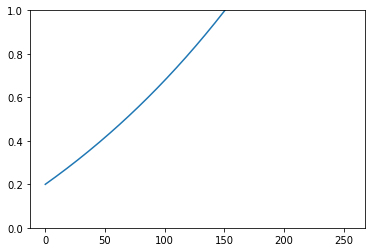

In [109]:
x=np.arange(0,256,1)
print(x)
plt.plot(np.exp(x/(256))-0.8)
#plt.plot((x/256)**2+0.2)
plt.ylim((0,1))

In [127]:
dx=2
dy=0.5
dz=0.5
ly=12
lz=12
###
xedges = np.arange(0,200,dx)
yedges = np.arange(-12,12+ly,dy)
zedges = np.arange(-12,12+lz,dz)

###
H, xedges1, yedges1 = np.histogram2d(x, y, bins=(xedges, yedges))
H = H.T

xedges2 = np.arange(0,210,10)
zedges2 = np.arange(-10,11,1)
H2, xedges2, zedges2 = np.histogram2d(x, z, bins=(xedges, zedges))
H2 = H2.T

yedges3 = np.arange(-10,11,1)
zedges3 = np.arange(-10,11,1)
H3, yedges3, zedges3 = np.histogram2d(y, z, bins=(yedges, zedges))
H3 = H3.T

#im=ax.scatter(x[color>450],y[color>450],z[color>450],s=0.1,c=color[color>450],cmap=cmap)

#im=ax.scatter(x,y,z,s=0.1,c=color,cmap=cmap)

#ax.contourf(x,y,z=10,s=0.1,zdir='y',cmap=cmap)#, c=c_list, label='points in (x, z)')

X1, Y1 = np.meshgrid(xedges1, yedges1)

X2, Z2 = np.meshgrid(xedges2, zedges2)

Y3, Z3 = np.meshgrid(yedges3, zedges3)
'''
cset = ax.contour(X1[:-1,:-1], Y1[:-1,:-1],H,zdir='z',offset=-ly,cmap=cm.twilight)
cset2 = ax.contour(X2[:-1,:-1],H2,Z2[:-1,:-1],zdir='y',offset=lz,cmap=cm.twilight)
cset3 = ax.contour(H3,Y3[:-1,:-1],Z3[:-1,:-1],zdir='x',offset=200,cmap=cm.twilight)
#ax.contourf(x[color>450],y[color>450],H.T,cmap=cmap)
'''

"\ncset = ax.contour(X1[:-1,:-1], Y1[:-1,:-1],H,zdir='z',offset=-ly,cmap=cm.twilight)\ncset2 = ax.contour(X2[:-1,:-1],H2,Z2[:-1,:-1],zdir='y',offset=lz,cmap=cm.twilight)\ncset3 = ax.contour(H3,Y3[:-1,:-1],Z3[:-1,:-1],zdir='x',offset=200,cmap=cm.twilight)\n#ax.contourf(x[color>450],y[color>450],H.T,cmap=cmap)\n"

In [128]:
dx=2
dy=0.5
dz=0.5
ly=12
lz=12
###
xedges = np.arange(0,200,dx)
yedges = np.arange(-12,12+ly,dy)
zedges = np.arange(-12,12+lz,dz)

###
H, xedges1, yedges1 = np.histogram2d(x, y, bins=(xedges, yedges))
H = H.T

xedges2 = np.arange(0,210,10)
zedges2 = np.arange(-10,11,1)
H2, xedges2, zedges2 = np.histogram2d(x, z, bins=(xedges, zedges))
H2 = H2.T

yedges3 = np.arange(-10,11,1)
zedges3 = np.arange(-10,11,1)
H3, yedges3, zedges3 = np.histogram2d(y, z, bins=(yedges, zedges))
H3 = H3.T

#im=ax.scatter(x[color>450],y[color>450],z[color>450],s=0.1,c=color[color>450],cmap=cmap)

#im=ax.scatter(x,y,z,s=0.1,c=color,cmap=cmap)

#ax.contourf(x,y,z=10,s=0.1,zdir='y',cmap=cmap)#, c=c_list, label='points in (x, z)')

X1, Y1 = np.meshgrid(xedges1, yedges1)

X2, Z2 = np.meshgrid(xedges2, zedges2)

Y3, Z3 = np.meshgrid(yedges3, zedges3)

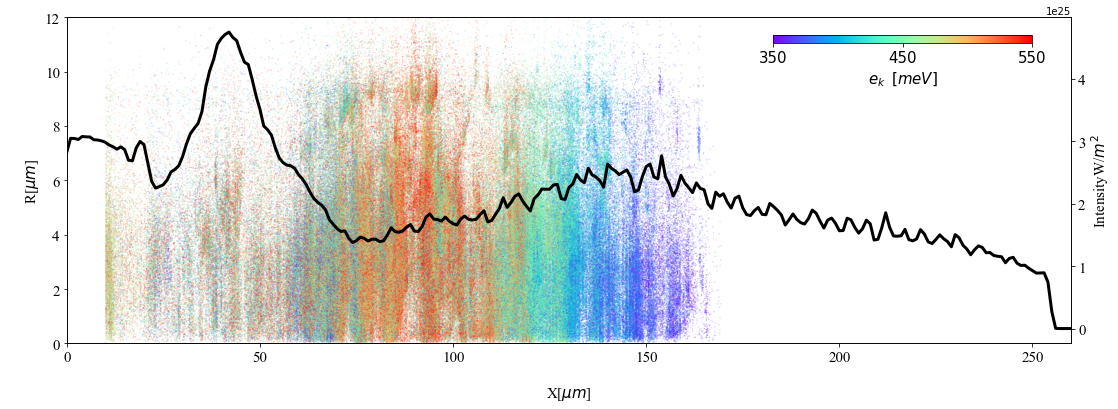

(680251,)

In [28]:
#r=np.loadtxt('x_r/r.txt')/10
#x=np.loadtxt('plot3d/x.txt')/1e-6
#I=np.loadtxt('x_r/I.txt')
#color=np.loadtxt('plot3d/ek.txt')
###
font = {'family' : 'Times New Roman',
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 15,  
        } 
name='${e_k}$  '
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
im=ax.scatter(x,r,s=0.01,c=color,cmap=cm.rainbow)
#cbar=fig.colorbar(im,ax=ax)

position=fig.add_axes([0.65+0.02, 0.8+0.02, 0.2, 0.02])

cbar=fig.colorbar(im,ticks=np.linspace(350, 550,3),fraction=0.015,cax=position,orientation='horizontal')
cbar.set_label(name+r'$[meV]$',fontdict=font)
im.set_clim((350,550))
ax2=ax.twinx()
line=ax2.plot(I,color='black',linewidth=3)
ax.set_xlim((0,260))
ax.set_ylim((0,12))

###
ax.set_xlabel('\nX'+ '[$\mu m$]',fontdict=font)
ax.set_ylabel('\nR'+ '[$\mu m$]',fontdict=font)
ax2.set_ylabel('Intensity'+'W/${m^2}$',fontdict=font)
cbar.ax.tick_params(labelsize=15)
#im.set_clim([0,600])
ax.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)
labels = ax.get_xticklabels() + ax.get_yticklabels() + ax2.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]

###


plt.show()
fig.savefig('2d_r.png',dpi=400,bbox_inches = 'tight')

r.shape
#I.shape

In [4]:
r=np.loadtxt('x_r/r.txt')/10
x=np.loadtxt('plot3d/x.txt')/1e-6
I=np.loadtxt('x_r/I.txt')
color=np.loadtxt('plot3d/ek.txt')/1.6e-13

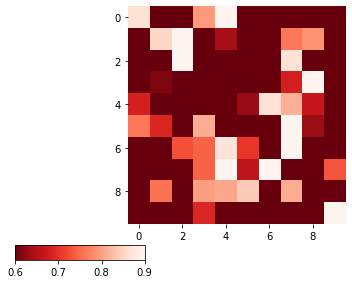

In [26]:
#coding=utf-8 
import numpy as np
import matplotlib.pyplot as plt 
data=np.random.rand(10,10)
fig, ax=plt.subplots()
data[data==-1]=np.nan#去掉缺省值-1
im =ax.imshow(data,interpolation='none',cmap='Reds_r',vmin=0.6,vmax=.9)#不插值
#去掉边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
########################################################################
position=fig.add_axes([0, 0, 0.3, 0.05])#位置[左,下,右,上]
cb=plt.colorbar(im,cax=position,orientation='horizontal')#方向